In [ ]:
 !pip install cmake face_recognition numpy opencv-python

     |████████████████████████████████| 100.2MB 75kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=c0bb166d18bb5b29d9863b89c4f19f16a21ffdb9c8c7d94808a7df988bdd69c0
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [ ]:
import face_recognition
import cv2
import numpy as np
import os
import glob
from google.colab.patches import cv2_imshow 
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
def read_img(path):
   img = cv2.imread(path) 
   (h,w) = img.shape[:2]  
   width = 500            
   ratio = width / float(w) 
   height = int(h * ratio)  
   return cv2.resize(img,(width,height)) 

In [ ]:
known_encodings = [] 
known_names = []
known_dir = '/content/gdrive/MyDrive/Data/known' 
for file in os.listdir(known_dir):
  img = read_img(known_dir + '/' + file)
  img_enc = face_recognition.face_encodings(img)[0] 
  known_encodings.append(img_enc) 
  known_names.append(file.split('.')[0])
print(known_names) 

['Steve Jobs', 'Bill Gates', 'Elon Musk', 'Donald Trump', 'Barack Obama', 'Michael Jordan']


Video Capt

In [ ]:
import imutils
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

<IPython.core.display.Javascript object>

400 300


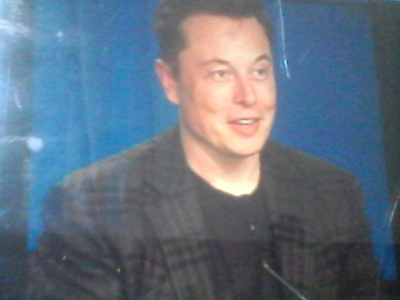

In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

image_file = take_photo()

#image = cv2.imread(image_file, cv2.IMREAD_UNCHANGED)
image = cv2.imread(image_file)

# resize it to have a maximum width of 400 pixels
image = imutils.resize(image, width=400)
(h, w) = image.shape[:2]
print(w,h)
cv2_imshow(image)

results [False, False, True, False, False, False]
[0.78140425 0.63339895 0.43930103 0.82757044 0.86803497 0.83937614]


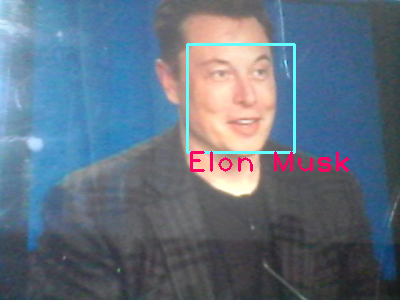

In [ ]:
 img_enc = face_recognition.face_encodings(image)[0]
 results = face_recognition.compare_faces(known_encodings,img_enc)
 print("results",results)
 print(face_recognition.face_distance(known_encodings,img_enc))
 for i in range(len(results)):
   if results[i] :
     name = known_names[i]
     (top,right,bottom,left) = face_recognition.face_locations(image)[0]
     cv2.rectangle(image,(left,top),(right,bottom),(255,255,100),2)
     cv2.putText(image,name,(left,bottom+20),cv2.FONT_HERSHEY_PLAIN,2, (100,0,255),2)
     cv2_imshow(image) 